# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress
import pprint as pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

591

In [32]:
cities

['ponta do sol',
 'fairbanks',
 'saint-pierre',
 'vardo',
 'shingu',
 'ushuaia',
 'rikitea',
 'tocopilla',
 'birjand',
 'kangaatsiaq',
 'nagato',
 'puerto ayora',
 'conceicao do araguaia',
 'vangaindrano',
 'hermanus',
 'zholymbet',
 'illoqqortoormiut',
 'kapaa',
 'anito',
 'grindavik',
 'arraial do cabo',
 'mendoza',
 'carnarvon',
 'bengkulu',
 'aksu',
 'estelle',
 'barrow',
 'port alfred',
 'pozo colorado',
 'atuona',
 'port elizabeth',
 'cabo san lucas',
 'port hardy',
 'albany',
 'shimoda',
 'saint george',
 'busselton',
 'mataura',
 'greensburg',
 'bredasdorp',
 'tuktoyaktuk',
 'provideniya',
 'taunggyi',
 'hobart',
 'yar-sale',
 'tigri',
 'khatanga',
 'warqla',
 'tunduru',
 'barentsburg',
 'chuy',
 'lyuban',
 'constitucion',
 'saint-augustin',
 'jamestown',
 'belaya gora',
 'inta',
 'awassa',
 'castro',
 'tsihombe',
 'ancud',
 'vaini',
 'guerrero negro',
 'nouadhibou',
 'jalu',
 'mitsamiouli',
 'suao',
 'port lincoln',
 'chokurdakh',
 'pokhara',
 'luang prabang',
 'port blair',
 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [33]:
# Build query URL and request your results for Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# set up lists to hold reponse info
city_name = []
lat = []
long = []
max_temperature = []
humidity = []
clouds = []
wind = []
country = []
time = []

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Print the header
print("Beginning Data Retrieval")
print("-----------------------------")

# Loop through cities in cities list
for city in cities:
#print(city)
    try:
        # Get weather data - To be sorted ######
        response = requests.get(query_url + city).json()
        #weather_json = weather_response.json()
    
        # Get temperature from JSON response
        #loop_count = i + 1
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        time.append(response["dt"])
        print(f"Processing Record 1 of Set 1 | {city}")
    
    except KeyError:
        print("City not found. Skipping...")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | ponta do sol
Processing Record 1 of Set 1 | fairbanks
Processing Record 1 of Set 1 | saint-pierre
Processing Record 1 of Set 1 | vardo
Processing Record 1 of Set 1 | shingu
Processing Record 1 of Set 1 | ushuaia
Processing Record 1 of Set 1 | rikitea
Processing Record 1 of Set 1 | tocopilla
Processing Record 1 of Set 1 | birjand
Processing Record 1 of Set 1 | kangaatsiaq
Processing Record 1 of Set 1 | nagato
Processing Record 1 of Set 1 | puerto ayora
Processing Record 1 of Set 1 | conceicao do araguaia
Processing Record 1 of Set 1 | vangaindrano
Processing Record 1 of Set 1 | hermanus
Processing Record 1 of Set 1 | zholymbet
City not found. Skipping...
Processing Record 1 of Set 1 | kapaa
Processing Record 1 of Set 1 | anito
Processing Record 1 of Set 1 | grindavik
Processing Record 1 of Set 1 | arraial do cabo
Processing Record 1 of Set 1 | mendoza
Processing Record 1 of Set 1 | carnarvon
Processing

Processing Record 1 of Set 1 | road town
Processing Record 1 of Set 1 | batagay
City not found. Skipping...
Processing Record 1 of Set 1 | aljezur
Processing Record 1 of Set 1 | debre tabor
Processing Record 1 of Set 1 | polunochnoye
Processing Record 1 of Set 1 | georgetown
Processing Record 1 of Set 1 | college
Processing Record 1 of Set 1 | yulara
City not found. Skipping...
Processing Record 1 of Set 1 | clearwater
Processing Record 1 of Set 1 | raga
Processing Record 1 of Set 1 | alice springs
Processing Record 1 of Set 1 | airai
Processing Record 1 of Set 1 | alanya
Processing Record 1 of Set 1 | lithakia
Processing Record 1 of Set 1 | nejapa
Processing Record 1 of Set 1 | sakakah
Processing Record 1 of Set 1 | sault sainte marie
Processing Record 1 of Set 1 | nikolskoye
Processing Record 1 of Set 1 | vao
Processing Record 1 of Set 1 | salalah
City not found. Skipping...
City not found. Skipping...
Processing Record 1 of Set 1 | tessalit
Processing Record 1 of Set 1 | emerald
Pro

Processing Record 1 of Set 1 | nongan
Processing Record 1 of Set 1 | albanel
City not found. Skipping...
Processing Record 1 of Set 1 | killybegs
Processing Record 1 of Set 1 | puerto narino
Processing Record 1 of Set 1 | cockburn town
Processing Record 1 of Set 1 | berlevag
Processing Record 1 of Set 1 | porto walter
Processing Record 1 of Set 1 | dudinka
Processing Record 1 of Set 1 | coquimbo
Processing Record 1 of Set 1 | chino valley
Processing Record 1 of Set 1 | ponta delgada
Processing Record 1 of Set 1 | bartlesville
Processing Record 1 of Set 1 | ewa beach
Processing Record 1 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 1 of Set 1 | oum hadjer
Processing Record 1 of Set 1 | westport
Processing Record 1 of Set 1 | hambantota
Processing Record 1 of Set 1 | mao
Processing Record 1 of Set 1 | bytow
Processing Record 1 of Set 1 | ulverstone
Processing Record 1 of Set 1 | tain
Processing Record 1 of Set 1 | chalus
Processing Record 1 of Set 1 | marienburg
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [90]:
# create a data frame from cities
weather_dict = {
    "City": city_name,
    "Lat": lat,
    "Long": long,
    "Max Temp": max_temperature,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind,
    "Country":country,
    "Time":time
}
weather_data_df = pd.DataFrame(weather_dict)

# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
weather_data_df.to_csv("city_data.csv", encoding="utf-8", index=False)

weather_data_df.head(20)

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Time
0,Ponta do Sol,32.6667,-17.1000,25.40,74,0,1.37,PT,<module 'time' (built-in)>
1,Fairbanks,64.8378,-147.7164,10.98,90,100,2.57,US,<module 'time' (built-in)>
2,Saint-Pierre,-21.3393,55.4781,21.82,71,75,2.57,RE,<module 'time' (built-in)>
3,Vardø,70.3705,31.1107,11.99,82,100,2.57,NO,<module 'time' (built-in)>
4,Shingū,33.7333,135.9833,25.19,92,20,2.15,JP,<module 'time' (built-in)>
5,Ushuaia,-54.8000,-68.3000,-0.19,93,20,1.03,AR,<module 'time' (built-in)>
6,Rikitea,-23.1203,-134.9692,20.34,67,87,8.77,PF,<module 'time' (built-in)>
7,Tocopilla,-22.0920,-70.1979,17.97,60,0,4.34,CL,<module 'time' (built-in)>
8,Birjand,32.8663,59.2211,32.26,8,0,7.20,IR,<module 'time' (built-in)>
9,Kangaatsiaq,68.3065,-53.4641,4.28,95,100,2.40,GL,<module 'time' (built-in)>


In [91]:
weather_data_pd.describe()

,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,20.269344,17.866924,22.283540,69.500000,60.187956,3.476569
std,32.490478,90.616660,8.359686,22.986086,38.313048,2.259710
min,-54.800000,-175.200000,-0.190000,8.000000,0.000000,0.000000
25%,-5.900625,-67.574700,16.197500,57.750000,20.000000,1.840000
50%,23.882150,21.649100,23.840000,74.000000,75.000000,3.090000
75%,46.595225,101.858700,28.072500,88.000000,100.000000,4.760000
max,78.218600,179.316700,45.760000,100.000000,100.000000,13.790000


In [92]:
weather_data_pd.dtypes


City           object
Lat           float64
Long          float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Time           object
dtype: object

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [93]:
high_humidity = []
max_hum = 100.1

#  Get the indices of cities that have humidity over 100%.
for city in cities:
    high_hum = weather_data_pd.loc[weather_data_pd["Humidity"] > max_hum, 'City' ]
    
    # add subset
    high_humidity.append(high_hum)
    
high_humidity

[Series([], Name: City, dtype: object),
 Series([], Name: City, dtype: object),
 Series([], Name: City, dtype: object),
 Series([], Name: City, dtype: object),
 Series([], Name: City, dtype: object),
 Series([], Name: City, dtype: object),
 Series([], Name: City, dtype: object),
 Series([], Name: City, dtype: object),
 Series([], Name: City, dtype: object),
 Series([], Name: City, dtype: object),
 Series([], Name: City, dtype: object),
 Series([], Name: City, dtype: object),
 Series([], Name: City, dtype: object),
 Series([], Name: City, dtype: object),
 Series([], Name: City, dtype: object),
 Series([], Name: City, dtype: object),
 Series([], Name: City, dtype: object),
 Series([], Name: City, dtype: object),
 Series([], Name: City, dtype: object),
 Series([], Name: City, dtype: object),
 Series([], Name: City, dtype: object),
 Series([], Name: City, dtype: object),
 Series([], Name: City, dtype: object),
 Series([], Name: City, dtype: object),
 Series([], Name: City, dtype: object),


In [94]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".



## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

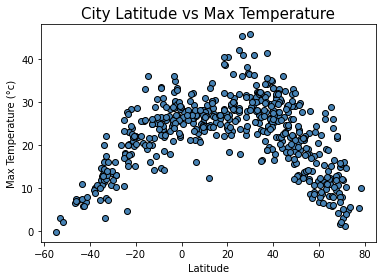

In [95]:
# Generate a scatter plot showing latitude vs. temperature.

max_temp_plt = weather_data_pd["Max Temp"]
lat_plt = weather_data_pd["Lat"]

# Give our chart some labels and a tile
plt.title(("City Latitude vs Max Temperature"),fontsize=15)
plt.ylabel("Max Temperature (°c)")
plt.xlabel("Latitude")


plt.scatter(lat_plt, max_temp_plt, marker="o", facecolors="steelblue", edgecolors="black")


## Latitude vs. Humidity Plot

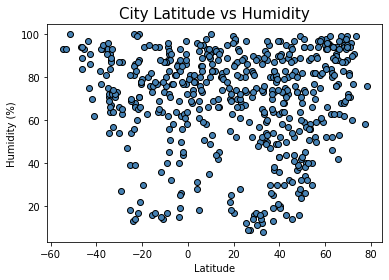

In [96]:
# Generate a scatter plot showing latitude vs. humidity.

humidity_plt = weather_data_pd["Humidity"]

# Give our chart some labels and a tile
plt.title(("City Latitude vs Humidity"),fontsize=15)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")


plt.scatter(lat_plt, humidity_plt, marker="o", facecolors="steelblue", edgecolors="black")

## Latitude vs. Cloudiness Plot

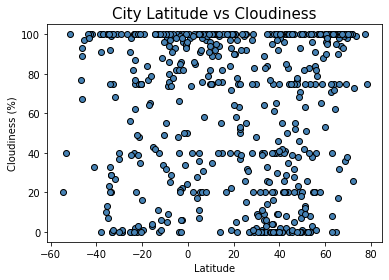

In [97]:
# Generate a scatter plot showing latitude vs. temperature.

cloudiness_plt = weather_data_pd["Cloudiness"]
#lat_plt = weather_data_pd["Lat"]

# Give our chart some labels and a tile
plt.title(("City Latitude vs Cloudiness"),fontsize=15)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")


plt.scatter(lat_plt, cloudiness_plt, marker="o", facecolors="steelblue", edgecolors="black")

## Latitude vs. Wind Speed Plot

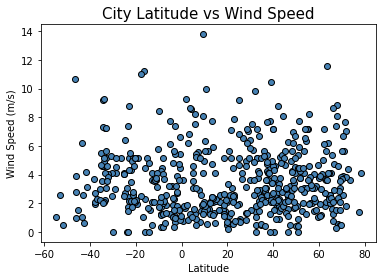

In [98]:
# Generate a scatter plot showing latitude vs. temperature.

wind_plt = weather_data_pd["Wind Speed"]
#lat_plt = weather_data_pd["Lat"]

# Give our chart some labels and a tile
plt.title(("City Latitude vs Wind Speed"),fontsize=15)
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")


plt.scatter(lat_plt, wind_plt, marker="o", facecolors="steelblue", edgecolors="black")

## Linear Regression

###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [131]:
# Calculate the correlation coefficient 
# for Max Temp vs. Latitude Linear Regression
north_df = weather_data_df[(weather_data_pd["Lat"] > 0)]
lat_n_plt = north_df["Lat"]
max_temp_n_plt = north_df["Max Temp"]
print(f"The r-value is {round(st.pearsonr(lat_n_plt, max_temp_n_plt)[0],2)}")

The r-value is -0.62


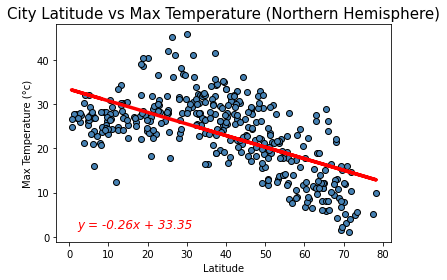

In [132]:
# Plot the line of regression latitude vs. temperature.
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_n_plt, max_temp_n_plt)
regress_values = lat_n_plt * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_n_plt,regress_values,"r-", linewidth=3.5)
plt.annotate(line_eq,(2,2),fontsize=12, fontstyle="italic", color="red")

# Give our chart some labels and a tile
plt.title(("City Latitude vs Max Temperature (Northern Hemisphere)"),fontsize=15)
plt.ylabel("Max Temperature (°c)")
plt.xlabel("Latitude")

plt.scatter(lat_n_plt, max_temp_n_plt, marker="o", facecolors="steelblue", edgecolors="black")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [125]:
# Calculate the correlation coefficient 
# for Humidity vs. Latitude Linear Regression
south_df = weather_data_df[(weather_data_pd["Lat"] < 0)]
lat_s_plt = south_df["Lat"]
max_temp_s_plt = south_df["Max Temp"]
print(f"The r-value is {round(st.pearsonr(lat_s_plt, max_temp_s_plt)[0],2)}")

The r-value is 0.83


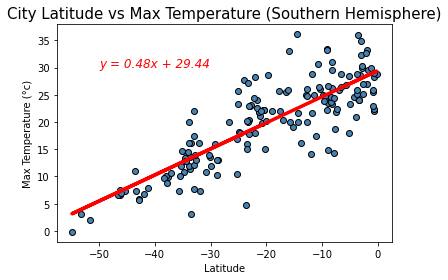

In [129]:
# Plot the line of regression latitude vs. temperature.
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_s_plt, max_temp_s_plt)
regress_values = lat_s_plt * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_s_plt,regress_values,"r-", linewidth=3.5)
plt.annotate(line_eq,(-50,30),fontsize=12, fontstyle="italic", color="red")

# Give our chart some labels and a tile
plt.title(("City Latitude vs Max Temperature (Southern Hemisphere)"),fontsize=15)
plt.ylabel("Max Temperature (°c)")
plt.xlabel("Latitude")

plt.scatter(lat_s_plt, max_temp_s_plt, marker="o", facecolors="steelblue", edgecolors="black")

### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [133]:
# Calculate the correlation coefficient 
# for Humidity vs. Latitude Linear Regression
humidity_n_plt = north_df["Humidity"]
print(f"The r-value is {round(st.pearsonr(lat_n_plt, humidity_n_plt)[0],2)}")

The r-value is 0.08


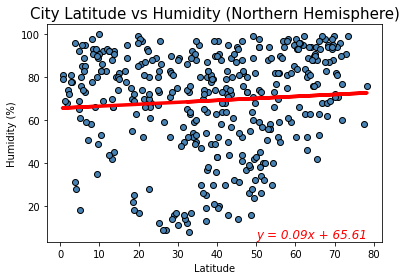

In [147]:
# Plot the line of regression latitude vs. Humidity (Northern Hemisphere).
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_n_plt, humidity_n_plt)
regress_values = lat_n_plt * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_n_plt,regress_values,"r-", linewidth=3.5)
plt.annotate(line_eq,(50,5),fontsize=12, fontstyle="italic", color="red")

# Give our chart some labels and a tile
plt.title(("City Latitude vs Humidity (Northern Hemisphere)"),fontsize=15)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

plt.scatter(lat_n_plt, humidity_n_plt, marker="o", facecolors="steelblue", edgecolors="black")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [137]:
# Calculate the correlation coefficient 
# for Humidity vs. Latitude Linear Regression
humidity_s_plt = south_df["Humidity"]
print(f"The r-value is {round(st.pearsonr(lat_s_plt, humidity_s_plt)[0],2)}")

The r-value is -0.23


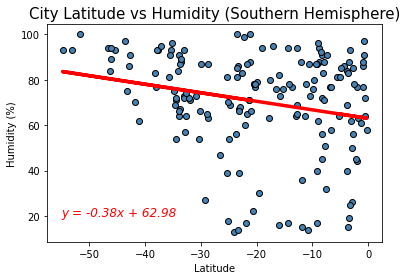

In [148]:
# Plot the line of regression latitude vs. Humidity (Northern Hemisphere).
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_s_plt, humidity_s_plt)
regress_values = lat_s_plt * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_s_plt,regress_values,"r-", linewidth=3.5)
plt.annotate(line_eq,(-55,20),fontsize=12, fontstyle="italic", color="red")

# Give our chart some labels and a tile
plt.title(("City Latitude vs Humidity (Southern Hemisphere)"),fontsize=15)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

plt.scatter(lat_s_plt, humidity_s_plt, marker="o", facecolors="steelblue", edgecolors="black")

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [140]:
# Calculate the correlation coefficient 
# for Cloudiness vs. Latitude Linear Regression
cloud_n_plt = north_df["Cloudiness"]
print(f"The r-value is {round(st.pearsonr(lat_n_plt, cloud_n_plt)[0],2)}")

The r-value is 0.05


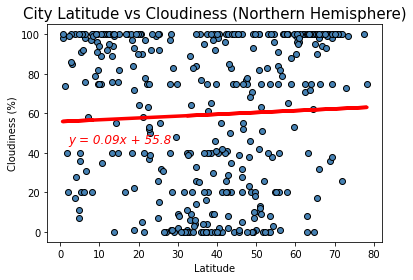

In [152]:
# Plot the line of regression latitude vs. Cloudiness (Northern Hemisphere).
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_n_plt, cloud_n_plt)
regress_values = lat_n_plt * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_n_plt,regress_values,"r-", linewidth=3.5)
plt.annotate(line_eq,(2,45),fontsize=12, fontstyle="italic", color="red")

# Give our chart some labels and a tile
plt.title(("City Latitude vs Cloudiness (Northern Hemisphere)"),fontsize=15)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

plt.scatter(lat_n_plt, cloud_n_plt, marker="o", facecolors="steelblue", edgecolors="black")

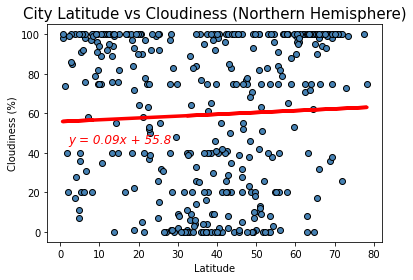

In [152]:
# Plot the line of regression latitude vs. Cloudiness (Northern Hemisphere).
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_n_plt, cloud_n_plt)
regress_values = lat_n_plt * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_n_plt,regress_values,"r-", linewidth=3.5)
plt.annotate(line_eq,(2,45),fontsize=12, fontstyle="italic", color="red")

# Give our chart some labels and a tile
plt.title(("City Latitude vs Cloudiness (Northern Hemisphere)"),fontsize=15)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

plt.scatter(lat_n_plt, cloud_n_plt, marker="o", facecolors="steelblue", edgecolors="black")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [153]:
# Calculate the correlation coefficient 
# for Cloudiness vs. Latitude Linear Regression
cloud_s_plt = south_df["Cloudiness"]
print(f"The r-value is {round(st.pearsonr(lat_s_plt, cloud_s_plt)[0],2)}")

The r-value is 0.04


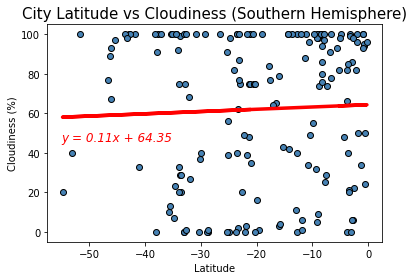

In [157]:
# Plot the line of regression latitude vs. Cloudiness (Northern Hemisphere).
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_s_plt, cloud_s_plt)
regress_values = lat_s_plt * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_s_plt,regress_values,"r-", linewidth=3.5)
plt.annotate(line_eq,(-55,46),fontsize=12, fontstyle="italic", color="red")

# Give our chart some labels and a tile
plt.title(("City Latitude vs Cloudiness (Southern Hemisphere)"),fontsize=15)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

plt.scatter(lat_s_plt, cloud_s_plt, marker="o", facecolors="steelblue", edgecolors="black")

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [159]:
# Calculate the correlation coefficient 
# for Cloudiness vs. Latitude Linear Regression
wind_n_plt = north_df["Wind Speed"]
print(f"The r-value is {round(st.pearsonr(lat_n_plt, wind_n_plt)[0],2)}")

The r-value is 0.05


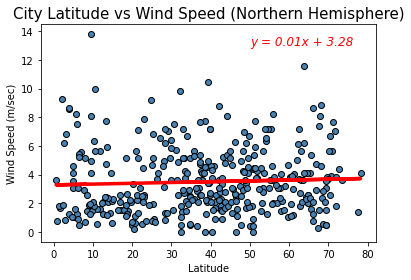

In [163]:
# Plot the line of regression latitude vs. Cloudiness (Northern Hemisphere).
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_n_plt, wind_n_plt)
regress_values = lat_n_plt * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_n_plt,regress_values,"r-", linewidth=3.5)
plt.annotate(line_eq,(50,13),fontsize=12, fontstyle="italic", color="red")

# Give our chart some labels and a tile
plt.title(("City Latitude vs Wind Speed (Northern Hemisphere)"),fontsize=15)
plt.ylabel("Wind Speed (m/sec)")
plt.xlabel("Latitude")

plt.scatter(lat_n_plt, wind_n_plt, marker="o", facecolors="steelblue", edgecolors="black")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [164]:
# Calculate the correlation coefficient 
# for Cloudiness vs. Latitude Linear Regression
wind_s_plt = south_df["Wind Speed"]
print(f"The r-value is {round(st.pearsonr(lat_s_plt, wind_s_plt)[0],2)}")

The r-value is -0.13


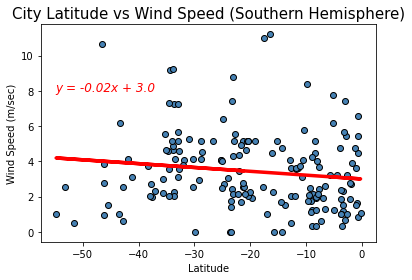

In [167]:
# Plot the line of regression latitude vs. Cloudiness (Northern Hemisphere).
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_s_plt, wind_s_plt)
regress_values = lat_s_plt * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_s_plt,regress_values,"r-", linewidth=3.5)
plt.annotate(line_eq,(-55,8),fontsize=12, fontstyle="italic", color="red")

# Give our chart some labels and a tile
plt.title(("City Latitude vs Wind Speed (Southern Hemisphere)"),fontsize=15)
plt.ylabel("Wind Speed (m/sec)")
plt.xlabel("Latitude")

plt.scatter(lat_s_plt, wind_s_plt, marker="o", facecolors="steelblue", edgecolors="black")